<a href="https://colab.research.google.com/github/LouisGraf/ADS2019/blob/master/Bonus_Case6_First_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class='bar_title'></div>

*Decision Support Systems*

# Headline

student1, student2, student3, student,4 <br>

Winter Semester 19/20

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Standard-LP" data-toc-modified-id="Standard-LP-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Standard LP</a></span></li><li><span><a href="#Robust-Optimization" data-toc-modified-id="Robust-Optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Robust Optimization</a></span></li><li><span><a href="#Chance-Constraints" data-toc-modified-id="Chance-Constraints-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Chance Constraints</a></span></li><li><span><a href="#Stochastic-Programming-1" data-toc-modified-id="Stochastic-Programming-1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stochastic Programming 1</a></span></li><li><span><a href="#Stochastic-Programming-2" data-toc-modified-id="Stochastic-Programming-2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stochastic Programming 2</a></span></li></ul></div>

In [1]:
!pip install pulp
from pulp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

     |████████████████████████████████| 39.2MB 57kB/s 


## Data Preparation

In [0]:
df_solar = pd.read_csv('https://github.com/wi3jmu/DSS1920/raw/master/Data/Solar_Data.csv', index_col=0)
df_consum = pd.read_csv('https://github.com/wi3jmu/DSS1920/raw/master/Data/Consum_Data.csv', index_col=0)

In [0]:
# we want to have day 0-365 instead of dates
days = df_consum.reset_index().index.tolist()

df_consum=df_consum.reset_index(drop=True)
df_solar=df_solar.reset_index(drop=True)

In [4]:
df_consum.head()

,consum_0,consum_1,consum_2,consum_3,consum_4,consum_5,consum_6,consum_7,consum_8,consum_9,consum_10,consum_11,consum_12,consum_13,consum_14,consum_15,consum_16,consum_17,consum_18,consum_19,consum_20,consum_21,consum_22,consum_23,consum_24,consum_25,consum_26,consum_27,consum_28,consum_29,consum_30,consum_31,consum_32,consum_33,consum_34,consum_35,consum_36,consum_37,consum_38,consum_39,...,consum_460,consum_461,consum_462,consum_463,consum_464,consum_465,consum_466,consum_467,consum_468,consum_469,consum_470,consum_471,consum_472,consum_473,consum_474,consum_475,consum_476,consum_477,consum_478,consum_479,consum_480,consum_481,consum_482,consum_483,consum_484,consum_485,consum_486,consum_487,consum_488,consum_489,consum_490,consum_491,consum_492,consum_493,consum_494,consum_495,consum_496,consum_497,consum_498,consum_499
0,79.026813,79.166693,79.603195,79.321704,78.426286,79.815542,78.060443,77.979138,79.978409,80.389137,79.983628,77.718385,78.826753,78.213426,81.529607,79.622439,79.088847,79.705980,78.777296,79.017739,79.132732,80.658701,79.690784,78.419326,79.713849,77.920537,78.286659,80.710708,80.288078,77.841154,80.332843,80.154104,79.096525,78.701293,79.006752,79.378216,78.287544,79.589120,78.900729,80.008631,...,79.479003,78.731002,77.116759,78.613561,79.264048,78.451245,77.811407,78.189922,77.646655,79.455129,80.323140,77.529353,78.735658,79.691361,81.163756,79.022683,78.537681,78.100602,79.567548,78.965276,78.672173,79.089917,76.990528,79.654411,79.446498,78.427800,78.382720,80.297832,77.312368,78.532333,76.788895,80.680322,78.984695,80.012801,79.185524,79.695756,78.573123,79.163573,78.000456,80.359045
1,78.145723,77.121751,77.307550,76.807391,79.711418,76.460352,75.988529,77.208810,78.901799,78.137209,78.327131,76.800837,77.592148,77.204121,77.220567,78.758530,78.283049,78.524081,78.764356,80.078982,78.255205,77.200663,75.603765,78.565217,78.149006,77.781233,78.503338,79.409621,77.624529,78.351365,78.757912,77.706867,76.894821,79.461543,79.016336,77.081311,78.382219,79.552381,77.981180,79.015688,...,77.805577,77.756585,77.133505,76.994955,76.999331,79.506828,78.002837,76.536134,78.690394,77.927025,78.214346,79.786492,79.150910,76.329103,76.623669,77.378768,78.046719,78.971564,78.388386,77.832902,76.692438,78.432444,77.867719,78.358724,80.210820,77.394123,79.063187,78.127170,77.647397,78.900818,80.060448,77.694551,76.057983,79.814416,79.439387,77.981815,78.109007,78.377900,78.283468,78.697465
2,67.557088,67.551236,66.104895,67.823331,67.983887,67.317197,68.318782,68.897925,68.324301,68.578712,67.489072,66.604344,67.518564,68.333429,67.749236,67.149078,67.908577,69.690595,67.425544,69.411555,66.686621,67.893034,67.481544,66.838989,68.762698,65.887169,68.605465,67.485527,68.239227,68.880257,67.662732,67.405812,67.806979,67.876469,67.807197,69.501742,68.074115,67.108040,67.865921,68.444906,...,68.083950,68.242012,67.394855,67.401678,67.464564,65.512036,68.261130,69.431548,69.403131,66.799248,68.902274,67.356914,67.981547,68.037285,68.209216,65.927135,67.125056,67.253395,68.954528,66.219790,67.011710,67.551036,69.098068,67.514062,67.094866,67.712130,68.558418,67.960915,67.055933,68.469175,66.727674,67.646057,68.218354,66.893765,67.366920,66.888175,66.818032,66.626834,68.943628,66.809443
3,48.924967,51.043785,50.011764,48.057107,48.912827,49.631908,49.234540,50.298924,49.099525,49.465574,49.501716,49.451673,50.061658,48.710608,49.050781,50.551722,47.881502,50.619277,49.905522,48.060175,49.538275,49.713193,48.177358,48.294964,48.442208,47.222726,48.684630,49.776176,49.475300,48.579748,49.811255,48.484334,50.559079,51.542947,48.622168,47.878957,49.641950,49.681159,49.703603,48.197222,...,49.566356,50.666148,48.589115,48.567081,49.221585,49.936864,50.813604,49.457281,49.523102,49.384034,50.217889,48.937132,49.179944,48.555640,49.391764,50.500473,47.206814,49.433313,50.543305,48.876097,49.834933,48.073718,50.603781,49.696105,49.536930,48.314175,48.621327,48.780312,50.246818,49.517935,47.933095,49.864442,50.377888,48.651444,5

In [5]:
df_solar.head()

,solar_0,solar_1,solar_2,solar_3,solar_4,solar_5,solar_6,solar_7,solar_8,solar_9
0,32.882083,33.528512,33.277529,33.873368,32.593289,33.582332,34.723709,33.890378,33.931324,34.700612
1,12.709871,12.278981,11.906540,13.306186,11.247804,11.964842,13.746997,13.189224,14.020067,12.965316
2,73.700604,73.458066,73.794748,73.397938,73.936536,75.131642,71.898934,74.021681,74.778660,74.111016
3,65.019633,62.821818,63.353230,63.795378,64.872601,63.624012,62.227826,64.055256,63.332238,63.844992
4,68.856726,67.962777,66.685048,68.398001,67.465437,69.204134,67.827804,68.758371,68.372007,67.796201


In [0]:
# Dictionaries for available solar energy and consumption
solar = df_solar.transpose().to_dict()
consum = df_consum.transpose().to_dict()

# Mean (and standard deviation) for available solar energy and consumption
solar_mean = df_solar.transpose().mean()
solar_std = df_consum.transpose().std()

consum_std = df_consum.transpose().std()
consum_mean = df_consum.transpose().mean()

In [7]:
print(solar_mean)
print(consum_std)
print(consum_mean)

0      33.698314
1      12.733583
2      73.822982
3      63.694698
4      68.132651
         ...    
361    67.437551
362    13.617733
363     5.235726
364    44.817943
365     0.474458
Length: 366, dtype: float64
0      0.982376
1      0.966927
2      0.970339
3      1.004112
4      0.942081
         ...   
361    0.998629
362    0.993521
363    0.989021
364    0.974350
365    0.981020
Length: 366, dtype: float64
0      79.043769
1      78.107283
2      67.877886
3      49.243723
4      63.972130
         ...    
361    64.655056
362    83.220945
363    76.853621
364    84.516477
365     4.523688
Length: 366, dtype: float64


## Standard LP

In [0]:
# Parameters
batterie_cost = 84/15
recycling_cost = 150
buying_price = 0.3

In [0]:
# Variables
solar_elec = LpVariable.dicts("solar_elec", days, lowBound=0, cat='Continuous')
buying_elec = LpVariable.dicts("buying_elec", days, lowBound=0, cat='Continuous')
battery_elec = LpVariable.dicts("battery_elec", days, lowBound=0, cat='Continuous')

battery_status = LpVariable.dicts("battery_status", days, lowBound=0, cat='Continuous')
battery_charge = LpVariable.dicts("battery_charge", days, lowBound=0, cat='Continuous')

batterie_kap = LpVariable("batterie_kap", lowBound=0, cat='Continuous')

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal
4573.776773859999
27.080882


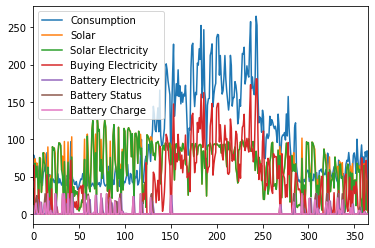

,Consumption,Solar,Solar Electricity,Buying Electricity,Battery Electricity,Battery Status,Battery Charge
0,79.043769,33.698314,33.698314,45.345455,0.0,0.000000,0.000000
1,78.107283,12.733583,12.733583,65.373700,0.0,0.000000,0.000000
2,67.877886,73.822982,67.877886,0.000000,0.0,5.945096,5.945096
3,49.243723,63.694698,49.243723,0.000000,0.0,20.396072,14.450976
4,63.972130,68.132651,63.972130,0.000000,0.0,24.556593,4.160521


In [10]:
# Create model
m = LpProblem("Solar System", sense=pulp.LpMinimize)

# Objective
m += lpSum([150 + batterie_cost * batterie_kap] + [buying_price * buying_elec[t] for t in days])

# Constraints
for t in days:
    m += solar_elec[t] + buying_elec[t] + battery_elec[t] >= consum_mean[t]
    
    m += solar_elec[t] + battery_charge[t] <= solar_mean[t]
    
    if (t==0):   
        m += 0 - battery_elec[t] + battery_charge[t] == battery_status[t]
    else:
        m += battery_status[t-1] - battery_elec[t] + battery_charge[t] == battery_status[t]
        
    m += battery_status[t] <= batterie_kap
    
# Solve problem
m.solve()
print (LpStatus[m.status])
obj = value(m.objective)
print (obj)

kap = batterie_kap.varValue
print(batterie_kap.varValue)

out = pd.DataFrame([[consum_mean[t], solar_mean[t],  solar_elec[t].varValue, buying_elec[t].varValue, battery_elec[t].varValue,
                     battery_status[t].varValue, battery_charge[t].varValue] for t in days],
                   columns = ['Consumption', 'Solar', 'Solar Electricity', 'Buying Electricity', 'Battery Electricity',
                              'Battery Status', 'Battery Charge'])
out.plot()
plt.show()
out.head()

## Robust Optimization

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal
4791.42409295
98.773618


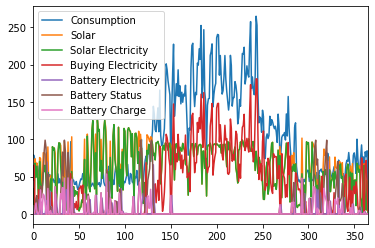

,Consumption,Solar,Solar Electricity,Buying Electricity,Battery Electricity,Battery Status,Battery Charge
0,79.043769,33.698314,33.698314,45.345455,0.0,0.000000,0.000000
1,78.107283,12.733583,12.733583,65.373700,0.0,0.000000,0.000000
2,67.877886,73.822982,67.877886,0.000000,0.0,5.945096,5.945096
3,49.243723,63.694698,49.243723,0.000000,0.0,20.396072,14.450976
4,63.972130,68.132651,63.972130,0.000000,0.0,24.556593,4.160521


In [33]:
# Create model
m_r = LpProblem("Solar System", sense=pulp.LpMinimize)

# Objective
m_r += lpSum(max([150 + batterie_cost * batterie_kap]) + [max(buying_price * buying_elec[t]) for t in days])

# Constraints
for t in days:
    m_r += solar_elec[t] + buying_elec[t] + battery_elec[t] >= consum_mean[t].max()
    
    m_r += solar_elec[t] + battery_charge[t] <= solar_mean[t].min()
    
    if (t==0):   
        m_r += 0 - battery_elec[t] + battery_charge[t] == battery_status[t]
    else:
        m_r += battery_status[t-1] - battery_elec[t] + battery_charge[t] == battery_status[t]
        
    m_r += battery_status[t] <= batterie_kap
    
# Solve problem
m_r.solve()
print (LpStatus[m_r.status])
obj_r = value(m.objective)
print (obj_r)

kap = batterie_kap.varValue
print(batterie_kap.varValue)

out = pd.DataFrame([[consum_mean[t], solar_mean[t],  solar_elec[t].varValue, buying_elec[t].varValue, battery_elec[t].varValue,
                     battery_status[t].varValue, battery_charge[t].varValue] for t in days],
                   columns = ['Consumption', 'Solar', 'Solar Electricity', 'Buying Electricity', 'Battery Electricity',
                              'Battery Status', 'Battery Charge'])
out.plot()
plt.show()
out.head()

## Chance Constraints

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal
4476.4574198503005
26.086121


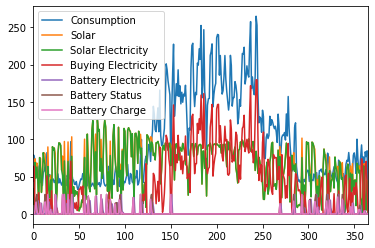

,Consumption,Solar,Solar Electricity,Buying Electricity,Battery Electricity,Battery Status,Battery Charge
0,79.043769,33.698314,33.698314,44.086490,0.0,0.000000,0.000000
1,78.107283,12.733583,12.733583,64.134533,0.0,0.000000,0.000000
2,67.877886,73.822982,68.842504,0.000000,0.0,4.980478,4.980478
3,49.243723,63.694698,47.956901,0.000000,0.0,20.718275,15.737797
4,63.972130,68.132651,62.764805,0.000000,0.0,26.086121,5.367846


In [35]:
#Create model
m_cc = LpProblem("Solar System", sense=pulp.LpMinimize)

# Objective
m_cc += lpSum([150 + batterie_cost * batterie_kap] + [buying_price * buying_elec[t] for t in days])

# Constraints
for t in days:
    m_cc += solar_elec[t] + buying_elec[t] + battery_elec[t] >= consum_mean[t]-norm.ppf(0.90)*consum_std[t]
    
    m_cc += solar_elec[t] + battery_charge[t] <= solar_mean[t].min()
    
    if (t==0):   
        m_cc += 0 - battery_elec[t] + battery_charge[t] == battery_status[t]
    else:
        m_cc += battery_status[t-1] - battery_elec[t] + battery_charge[t] == battery_status[t]
        
    m_cc += battery_status[t] <= batterie_kap
    
# Solve problem
m_cc.solve()
print (LpStatus[m_cc.status])
obj_mcc = value(m_cc.objective)
print (obj_mcc)

kap_mcc = batterie_kap.varValue
print(batterie_kap.varValue)

out_mcc = pd.DataFrame([[consum_mean[t], solar_mean[t],  solar_elec[t].varValue, buying_elec[t].varValue, battery_elec[t].varValue,
                     battery_status[t].varValue, battery_charge[t].varValue] for t in days],
                   columns = ['Consumption', 'Solar', 'Solar Electricity', 'Buying Electricity', 'Battery Electricity',
                              'Battery Status', 'Battery Charge'])
out_mcc.plot()
plt.show()
out_mcc.head()

## Stochastic Programming 1

In [0]:
# different scenarios for the buying price
buying_price = [0.28, 0.3, 0.32, 0.35, 0.4, 0.5]
scenarios = range(len(buying_price))
days_scenarios = [(t,s) for s in scenarios for t in days]

## Stochastic Programming 2